<div class="">
    <font color = 'black'>
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Jaringan Saraf Tiruan
<center><br><font size="5"><font face="calibri"><strong>Classification of Neural Network Structures For Breast Cancer Diagnosis
<br>
<br>FEBI RUSMIATI
<br>09011181722025
<br>

Neural Network sangat digunakan di klasifikasi data yang berkaitan dengan bidang medis. Neural Network mampu memproses sinyal paralel berkecepatan tinggi secara real time.

<div class='alert alert-info'>
    <font size='5'> Import Library

In [1]:
#memanggil library yang akan digunakan
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt #membuat plot
from sklearn.model_selection import train_test_split #membagikan data
from keras.optimizers import Adam
from keras.models import Sequential #library untuk model lapisan bertumpuk
from keras.layers import Dense, Dropout #untuk menambahkan layer
from keras.activations import relu
import pandas as pd #mengelolah data
import numpy as np #untuk komputasi array
import seaborn as sns #membuat grafik statistik
import sklearn
import keras #modul yang menyediakan arsitektur berbagai model Dee Learning

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<div class='alert alert-info'>
    <font size='5'> Load Dataset

Dataset yang dipakai adalah Breast Cancer Wisconsin. Dataset yang ini bisa di dapatkan di https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [2]:
dataset = pd.read_csv("C:/Users/user/Desktop/KECERDASAN BUATAN/ANN/TUBES/breast-cancer-wisconsin.csv", sep=';')
dataset.head() #untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random)

,id,1,2,3,4,5,6,7,8,9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
#berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata. median, dan lain sebagainnya pada kolom
dataset.describe()

,id,1,2,3,4,5,6,7,8,9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.527897,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.636059,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id       699 non-null int64
1        699 non-null int64
2        699 non-null int64
3        699 non-null int64
4        699 non-null int64
5        699 non-null int64
6        699 non-null int64
7        699 non-null int64
8        699 non-null int64
9        699 non-null int64
Class    699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Informasi Attribute

Atribut yang terdapat berdasarkan Breast Cancer Wisconsin Dataset adalah sebagai berikut :

| No | Atttibute                      | Domain          |
|----|--------------------------------|-----------------|
| 1  | Clump thickness                |  1-10           |
| 2  | Uniformity of cell size 1-10   |  1-10           |
| 3  | Uniformity of cell shape 1-10  |  1-10           |
| 4  | Marginal Adhesion              |  1-10           |
| 5  | Single Epithelial Cell Size    |  1-10           |
| 6  | Bare Nuclei                    |  1-10           |
| 7  | Bland Chromatin                |  1-10           |
| 8  | Normal Nucleoli                |  1-10           |
| 9  | Mitoses                        |  1-10           |         
| 10 | Class                          | 2 for benign    |
|    |                                |  4 for malignant|
   
Ada dua nilai dalam variabel Class pada breast cancer yaitu Benign dan Malignant yang direpresentasikan secara numerik dengan 2 dan 4.

In [5]:
dataset.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

Text(0,0.5,'Frequency')

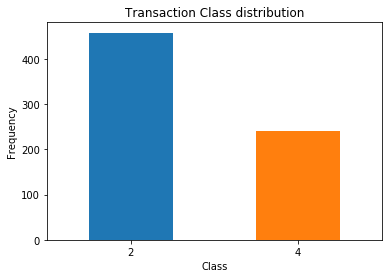

In [6]:
labels = ['2','4']
classes = pd.value_counts(dataset['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

# Histogram 

Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.  

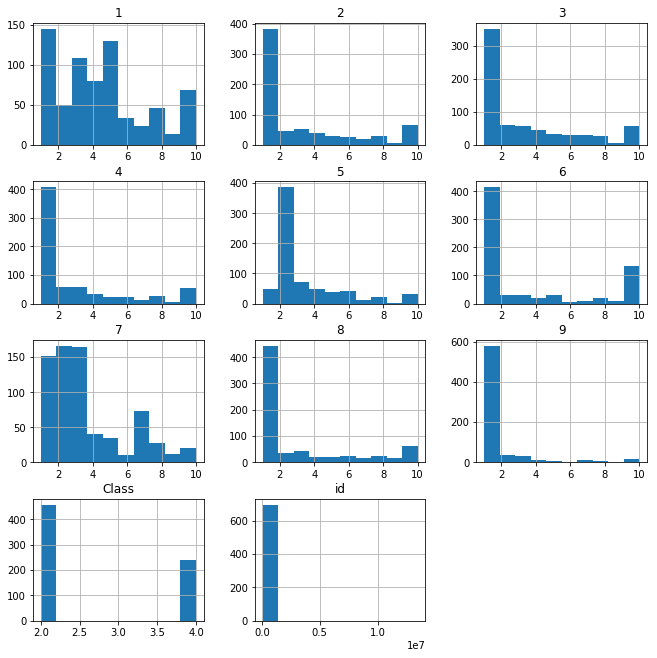

In [7]:
dataset.hist(figsize=(11,11)) #untuk menemukan dan menunjukkan distribusi frekuensi berdasarkan serangkaian data
plt.show() #untuk menampilkannya dalam bentuk grafik

id          AxesSubplot(0.125,0.821923;0.352273x0.0580769)
1        AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
2           AxesSubplot(0.125,0.752231;0.352273x0.0580769)
3        AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
4           AxesSubplot(0.125,0.682538;0.352273x0.0580769)
5        AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
6           AxesSubplot(0.125,0.612846;0.352273x0.0580769)
7        AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
8           AxesSubplot(0.125,0.543154;0.352273x0.0580769)
9        AxesSubplot(0.547727,0.543154;0.352273x0.0580769)
Class       AxesSubplot(0.125,0.473462;0.352273x0.0580769)
dtype: object

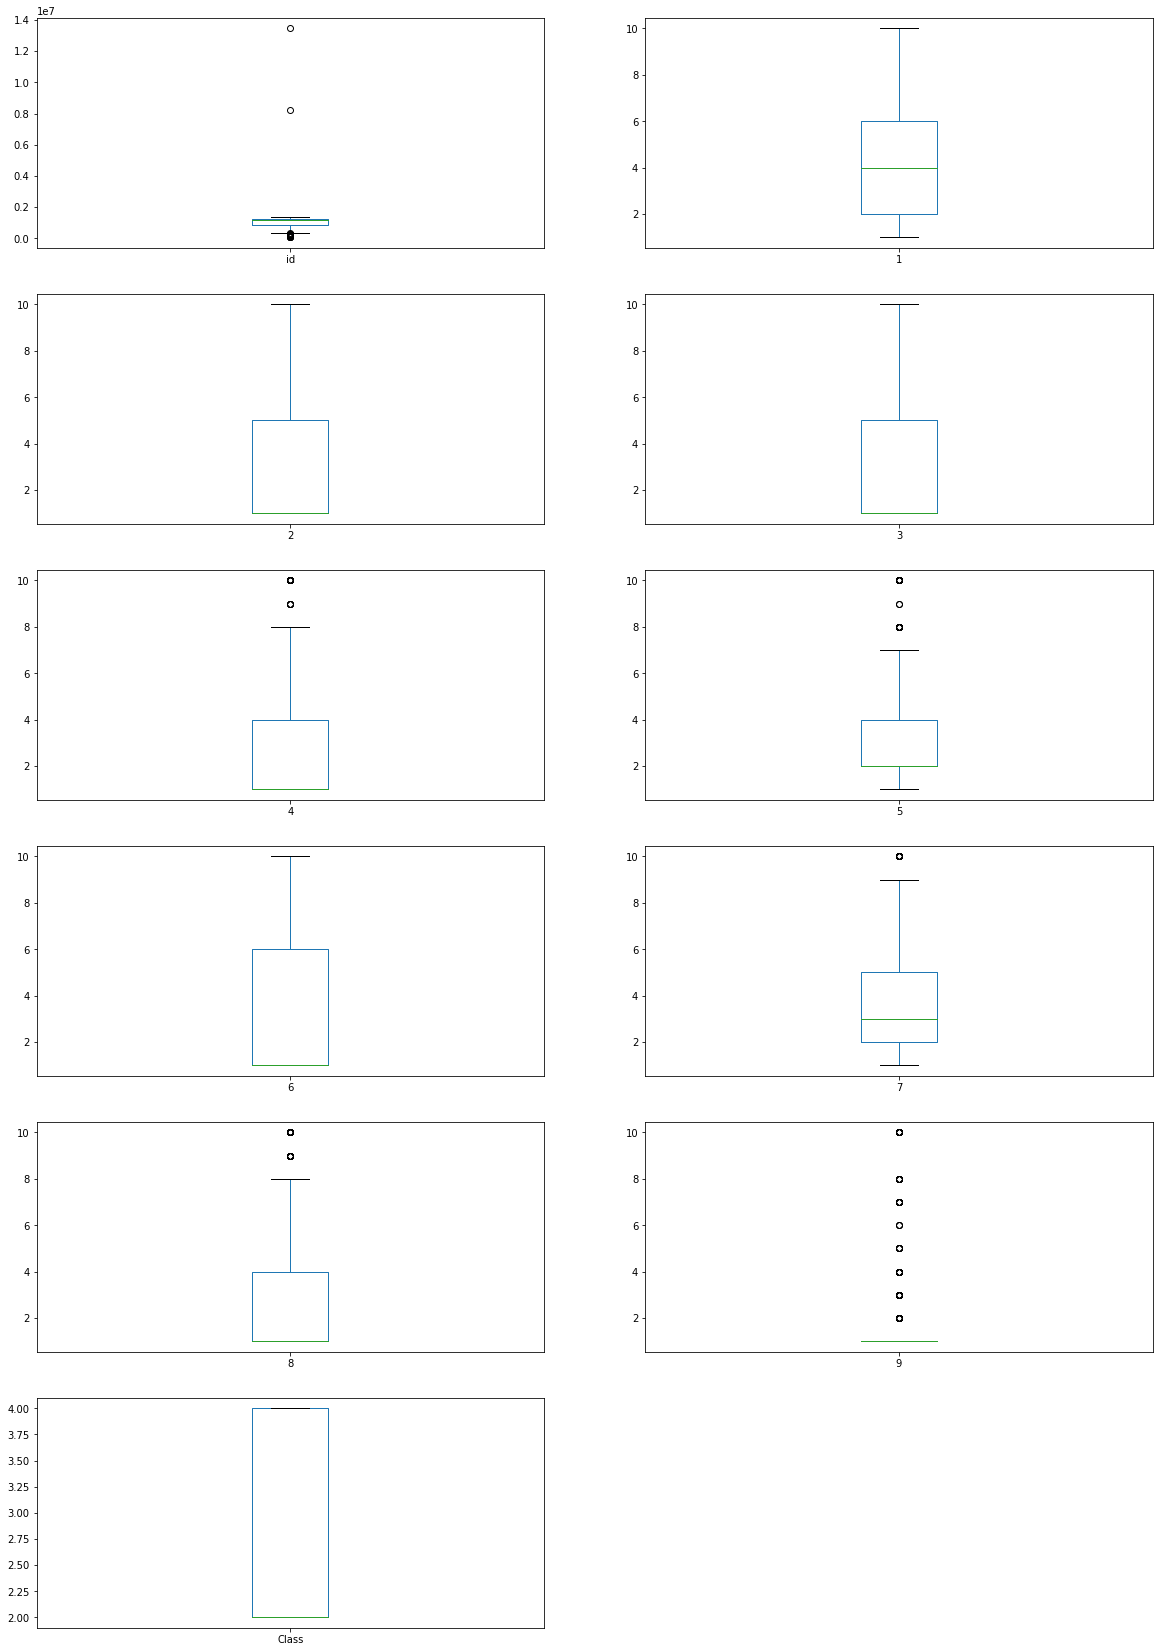

In [8]:
dataset.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(20,55))

<div class='alert alert-info'>
    <font size='5'> 

In [9]:
x = dataset.iloc[:,0:10].values #nilai variabel x diambil dari kolom 0-10 (input)
y = dataset.iloc[:,10].values #nilai variabel y diambil dari kolom 11 (output)

In [10]:
data = pd.DataFrame(x)
data

,0,1,2,3,4,5,6,7,8,9
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
5,1017122,8,10,10,8,7,10,9,7,1
6,1018099,1,1,1,1,2,10,3,1,1
7,1018561,2,1,2,1,2,1,3,1,1
8,1033078,2,1,1,1,2,1,1,1,5
9,1033078,4,2,1,1,2,1,2,1,1


<div class='alert alert-info'>
    <font size='5'> Scaling 

Karena dilihat pada persebaran data, agar data tidak memiliki standar deviasi yang tinggi, maka selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0

In [11]:
#melakukan scaling dataset
from keras.utils.np_utils import to_categorical
scaler = MinMaxScaler() #mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan

x_scaled = scaler.fit_transform(x) #merubah atau melakukan scaling pada nilai variabel x
x_scaled.shape

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(699, 10)

In [12]:
#mengkonversi Class bilangan bulat menjadi bilangan biner
y_categorical = to_categorical(y)
y_categorical.shape

(699, 5)

<div class='alert alert-info'>
    <font size='5'> Splitting

Membagi data secara acak, dengan persentase 80% untuk data latih, 20% untuk data testing. Random state digunakan agar data yang sudah baik, tidak diacak lagi saat spliting, agar persebaran data tidak berubah, yang bisa mempengaruhi learning dari model.

In [13]:
#membagi dataset dengan training 70% dari data dan testing 15% dari data, sisa nya akan digunakan untuk validasi,dan setiap data pilih secara acak
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_categorical, 
                                                   train_size=0.7,
                                                   test_size=0.30, 
                                                   random_state=7)

In [14]:
#mencetak ukuran data training dan testing, dimana X_train dan X_test untuk masukan, sedangkan y_train dan y_test untuk keluaran
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (489, 10) (489, 5)
Testing data shape :  (210, 10) (210, 5)


In [15]:
# mencetak kelas keluaran yang dihasilkan (0 atau 1)
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', classes)
print('Output classes : ', nClasses)

Total number of outputs :  [0. 1.]
Output classes :  2


<div class='alert alert-info'>
    <font size='5'> Model

Model Sequential adalah tumpukan lapisan linear. 
Dalam hal ini, terdapat :
1. Input layer -> Layer pertama terbentuk dari 10 layer Neural sesuai fitur dengan menggunakan activation relu.
2. Hidden Layer pertama -> 11 units Neural Network dengan menggunakan activation relu.
3. Hidden Layer Kedua -> 11 units Neural Network dengan menggunakan activation relu.
4. Output layer -> 5 unit Neural Network dengan menggunakan activation sigmoid.

-> Relu adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf

-> Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum

In [16]:
#membuat jaringan saraf dengan model sekuensial dengan menggunakan 4 input dengan neuron 4 fungsi aktifasi relu dan 1 hidden layer dengan neuron 10 fungsi aktifasi relu, menggunakan bias 0,4 dan 1 keluaran dengan fungsi aktifasi sigmoid, fungsi relu (f(x)= max(0,x) akan menghasil 0 atau x, apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x, sedangkan fungsi sigmoid (1 / (1 + exp (-x))) akan menerima angka tunggal dan mengubah nilai x menjadi sebuah nilai yang memiliki range mulai dari 0 sampai 1
model = Sequential()
model.add(Dense(11, input_dim=10, activation='relu', use_bias= 0.4))
model.add(Dense(11, activation='relu', use_bias= 0.4))
model.add(Dense(5, activation='sigmoid'))

In [17]:
model.summary() #menampilkan ringkasan parameter berdasarkan layer dan output shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                121       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 60        
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


<div class='alert alert-info'>
    <font size='5'> Compile Data

Compile berfungsi untuk mengembalikan objek kode dari sumber (string normal, string byte, atau objek AST). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
y_test.shape

(210, 5)

<div class='alert alert-info'>
    <font size='5'> Fit

Proses training model. Disini akan dilakukan training model, dimana JST akan melakukan learning berdasarkan data latih yaitu **x_training** dan **y_training**. Disini juga dilakukan validasi dengan data uji, ditampung pada variabel **x_testing** dan **y_testing**. Guna dilakukan FIT adalah agar setiap epochnya dapat ditampung dalam variabel **history**, sehingga bisa diplot perubahannya.

In [20]:
#untuk melatih model kita menggunakan model.fit dimana X_train adalah numpy array yang digunakan sebagai data training untuk inputan, y_test adalah numpy array yang digunakan untuk data target atau keluaran, batch_size jumlah sampel per pembaharuan gradien jika tidak kita set maka nilai nya akan menggunakan nilai default yaitu 32, epochs jumlah epochs untuk melatih model, epochs adalah iterasi atas seluruh data x dan y yang disediakan, 1 kali epochs sama dengan satu kali perhitungan maju mundur, validation_data(15%) untuk mengevaluasi kerugian dan metrik model apa pun pada setiap akhir epochs.  
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=4)

Train on 489 samples, validate on 210 samples
Epoch 1/10
489/489 [==============================] - 5s 10ms/step - loss: 0.6079 - accuracy: 0.7930 - val_loss: 0.4882 - val_accuracy: 0.8381
Epoch 2/10
489/489 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.9088 - val_loss: 0.2885 - val_accuracy: 0.9752
Epoch 3/10
489/489 [==============================] - 1s 1ms/step - loss: 0.2151 - accuracy: 0.9869 - val_loss: 0.1613 - val_accuracy: 0.9762
Epoch 4/10
489/489 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9890 - val_loss: 0.0984 - val_accuracy: 0.9733
Epoch 5/10
489/489 [==============================] - 0s 958us/step - loss: 0.0704 - accuracy: 0.9885 - val_loss: 0.0719 - val_accuracy: 0.9771
Epoch 6/10
489/489 [==============================] - 0s 928us/step - loss: 0.0521 - accuracy: 0.9890 - val_loss: 0.0622 - val_accuracy: 0.9771
Epoch 7/10
489/489 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.98

In [21]:
#mencetak predict dari input yang akan diperoleh
predict = model.predict(x_scaled)
predict

array([[1.52358413e-03, 1.07976794e-03, 9.85353887e-01, 5.77390194e-04,
        1.76960826e-02],
       [8.17060471e-04, 1.54343247e-03, 1.18154556e-01, 1.20148063e-03,
        8.50318909e-01],
       [3.08790803e-03, 2.21803784e-03, 9.83921289e-01, 1.25160813e-03,
        1.89731121e-02],
       ...,
       [1.28537416e-04, 2.40325928e-04, 7.60093331e-03, 2.29418278e-04,
        9.91778195e-01],
       [4.65750694e-04, 8.39591026e-04, 2.77728140e-02, 7.68366212e-04,
        9.68997240e-01],
       [3.82469821e-04, 7.41271651e-04, 1.95889771e-02, 7.29103689e-04,
        9.76903081e-01]], dtype=float32)

<div class='alert alert-info'>
    <font size='5'> Perhitungan Accuracy

Evaluasi dengan mencari skor data atau akurasi data testing. Nilai evaluasi disimpan pada variabel Scores.

In [22]:
#mencetak accuracy yang didapat
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

210/210 [==============================] - 0s 181us/step

accuracy: 97.90%


<div class='alert alert-info'>
    <font size='5'> Plot Accuracy Model

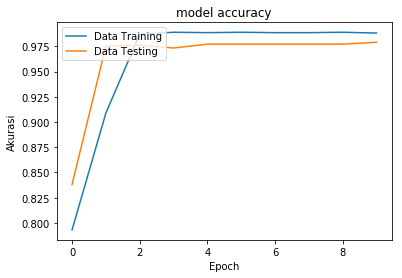

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

<div class='alert alert-info'>
    <font size='5'> Plot Loss

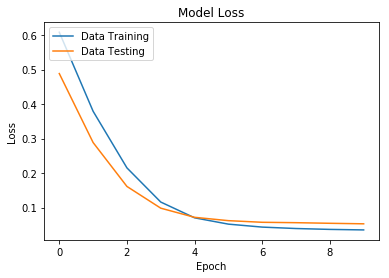

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

<div class='alert alert-info'>
    <font size='5'> Confussion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya.
Karena klasifikasinya adalah binary (1 dan 0) maka ada 4 kemungkinan prediksi yaitu True Positive, False Positive, False Negative, True Negative.

In [25]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_categorical.argmax(axis=1), predict.argmax(axis=1))

In [26]:
ConfusionMatrix

array([[447,  11],
       [ 10, 231]], dtype=int64)

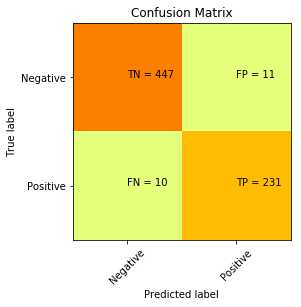

In [27]:
#agar lebih mudah membaca confusion matrix bisa kita tampilkan dalam bentuk plot,
# keterangan dari plot, TN : True Negatif, FP: False positif, FN : False negatif, TP : true positif
plt.clf()
plt.imshow(ConfusionMatrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(ConfusionMatrix[i][j]))
plt.show()

## ACCURACY
Melalui confusion matrix, rumus dalam menghitung nilai akurasinya adalah sebagai berikut :

$$ Accuracy = \frac{TN + TP}{TN + FP + FN + TP} $$

## PRECISSION
Melalui confusion matrix, rumus dalam menghitung nilai presisinya adalah sebagai berikut :

$$ Presisi = \frac{TN}{TN + FP} $$

## RECALL
Melalui confusion matrix, rumus dalam menghitung nilai recallnya adalah sebagai berikut :

$$ Recall = \frac{TN}{TN + FN} $$

In [30]:
accuracy = ((447+231) / (447+10+11+231))
presisi = ((447) / (447+11))
recall = ((447) / (10+447))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))
print("\n%s: %.2f%%" % ("Presisi", presisi*100))
print("\n%s: %.2f%%" % ("recall", recall*100))


Accuracy: 97.00%

Presisi: 97.60%

recall: 97.81%
